# 12/13/22 - Kinematic analysis of SLACS lenses for KCWI data paper. Looking at the fast/slow rotator classification calculations, integrated velocity dispersions, etc.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 14})
plt.rcParams.update({"figure.figsize" : (8, 6)})
from astropy.io import fits

In [2]:
def calc_V_sigma_squared (delta, omega, alpha):
    
    numerator = (1-delta) * omega - 1
    denominator = alpha * (1-delta) * omega + 1
    
    V_sigma_sq = numerator/denominator
    
    return V_sigma_sq

def calc_omega (e):
    
    numerator = np.arcsin(e)/np.sqrt(1-e**2) - e
    denominator = e - np.arcsin(e) * np.sqrt(1-e**2)
    
    omega = 0.5 * numerator/denominator
    
    return omega

def calc_e (epsilon):
    
    e = np.sqrt( 1 - (1 - epsilon)**2 )
    
    return e

In [3]:
epsilon = 0.5
delta = 0.0
alpha = 0.15

e = calc_e(epsilon)
omega = calc_omega(e)
V_sigma_sq = calc_V_sigma_squared(delta, omega, alpha)

print(V_sigma_sq)

0.6253722178308376


In [4]:
def calc_isotropic_V_sigma (epsilon):
    
    # isotropic delta = 0
    delta = 0
    # alpha empirically = 0.15
    alpha = 0.15
    
    # calculations
    e = calc_e(epsilon)
    omega = calc_omega(e)
    V_sigma_squared = calc_V_sigma_squared(delta, omega, alpha)
    V_sigma_iso = np.sqrt(V_sigma_squared)
    
    return(V_sigma_iso)
    

In [5]:
calc_isotropic_V_sigma (0.5)

0.7908047912290603

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in double_scalars
  from ipykernel import kernelapp as app
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in double_scalars
  if sys.path[0] == '':
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in double_scalars
  


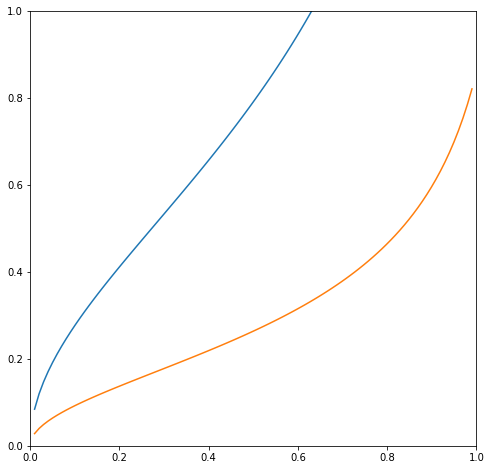

In [6]:
epsilons = np.linspace(0,1,100)
V_sigmas = np.zeros(100)

i=0
for epsilon in epsilons:
    V_sigma = calc_isotropic_V_sigma(epsilon)
    V_sigmas[i] = V_sigma
    i = i+1

plt.figure(figsize=(8,8))
plt.xlim(0.0,1.0)
plt.ylim(0.0,1.0)
plt.plot(epsilons, V_sigmas)
plt.plot(epsilons, 1/3 * V_sigmas)

In [7]:
obj_name = 'SDSSJ0029-0055'
obj_abbr = obj_name[4:9] # e.g. J0029

# data directory
data_dir = '/data/raw_data/KECK_KCWI_SLACS_kinematics_shawn/'
# object directory
dir = f'{data_dir}mosaics/{obj_name}/'

#KCWI mosaic datacube
name = f'KCWI_{obj_abbr}_icubes_mosaic_0.1457'

save_dir = f'{dir}{obj_name}_systematics/'

In [8]:
VD=np.genfromtxt(f'{dir}{obj_name}_final_kinematics/{obj_name}_VD_binned.txt',
                 delimiter=',')
VD_cov = np.genfromtxt(f'{dir}{obj_name}_final_kinematics/{obj_name}_covariance_matrix_VD.txt',
                 delimiter=',')
dVD = np.sqrt(np.diagonal(VD_cov))
V=np.genfromtxt(f'{dir}{obj_name}_final_kinematics/{obj_name}_V_binned.txt',
                 delimiter=',')
# subtract the mean V
V = V - np.mean(V)

In [9]:
VD.shape

(193,)

In [10]:
## import voronoi binning data
voronoi_binning_data = fits.getdata(dir +'voronoi_binning_' + name + '_data.fits')
vorbin_pixels = np.genfromtxt(f'{dir}voronoi_2d_binning_{name}_output.txt',
                 delimiter='')

In [11]:
# sort the voronoi bin pixel data by bin
vorbin_pixels = vorbin_pixels[vorbin_pixels[:,2].argsort()]

In [12]:
voronoi_binning_data.shape

(193, 5215)

In [13]:
np.sum(voronoi_binning_data[0])

46.56224683860459

In [14]:
voronoi_binning_data

array([[-1.04327070e+00, -3.48771208e-01, -4.07077471e-02, ...,
        -5.71330273e-11,  5.81965010e-10, -8.57840166e-11],
       [-1.65305545e-01, -5.19808558e-02, -5.49226893e-03, ...,
        -2.53551615e-11,  4.11457583e-10,  4.56602370e-10],
       [-1.66051458e-01, -5.05358511e-02, -4.72523857e-03, ...,
        -7.19188196e-12,  1.16708835e-10,  1.29512762e-10],
       ...,
       [ 2.11107500e+00,  6.39783269e-01,  5.76862562e-02, ...,
        -1.46444346e-12, -6.19374053e-13, -7.61659298e-13],
       [-2.39237950e+00, -8.36421084e-01, -1.10167316e-01, ...,
        -7.56991127e-10,  4.70339996e-09, -4.11666802e-09],
       [-2.84205921e+00, -9.47620626e-01, -1.11191807e-01, ...,
         1.19936437e-10, -6.46204879e-12,  1.07146340e-10]])

In [15]:
# sum each bin across all wavelengths

bin_luminosities = np.zeros(len(VD))

for i in range(len(VD)):
    lum = np.sum(voronoi_binning_data[i])
    bin_luminosities[i] = lum
    
bin_luminosities

array([ 46.56224684,  46.66780916,  41.83787413,  42.21674527,
        37.76461507,  41.9217586 ,  38.11880304,  34.56359637,
        38.87069007,  33.75140074,  34.58318887,  31.12777136,
        31.64439302,  37.15869227,  28.65873965,  35.31044472,
        27.90095755,  29.97303981,  22.17037648,  23.10866547,
        25.6652339 ,  39.05510575,  32.66404045,  22.82857676,
        41.17408371,  24.31306654,  36.55112312,  39.25998667,
        26.24096441,  32.15665501,  45.71751117,  35.52898756,
        37.0686952 ,  30.45141021,  26.05274567,  39.06830415,
        39.05510575,  22.17037648,  40.57170666,  58.54028178,
        52.00274879,  55.81736799,  40.82333849,  23.10866547,
        29.60166623,  23.75598301,  23.75598301,  45.33796627,
        39.0420046 ,  58.20614341,  75.61642732,  86.66551162,
        62.73140297,  54.37742995,  46.65172484,  40.47060574,
        30.67925177,  74.90594773,  95.23583379,  53.22743   ,
        29.02569338,  23.32802131,  93.68500041,  80.71

In [16]:
np.max(VD)

267.04286941503244

In [17]:
len(bin_luminosities)

193

In [9]:
def lum_weight_bin (V, VD, dVD, lum):
    
    bin_weighted_V_sq = lum * V**2
    bin_weighted_VD_sq = lum * VD**2
    bin_weighted_dVD_sq = lum * 2 * VD * dVD

    return bin_weighted_V_sq, bin_weighted_VD_sq, bin_weighted_dVD_sq

def lum_weight_V_sigma (V_array, VD_array, dVD_array, lum_array):
    
    assert (len(V_array)==len(VD_array)) & (len(V_array)==len(lum_array)) & (len(V_array)==len(dVD_array))
    
    V_sq = 0
    VD_sq = 0
    dVD_sq = 0
    
    for i in range(len(V_array)):
        bin_V_sq, bin_VD_sq, bin_dVD_sq = lum_weight_bin(V_array[i], VD_array[i], dVD_array[i], lum_array[i])
        V_sq += bin_V_sq
        VD_sq += bin_VD_sq
        dVD_sq += bin_dVD_sq
    
    V_sigma_sq = V_sq/VD_sq
    V_sigma = np.sqrt(V_sigma_sq)
    
    VD_integrated_rms = np.sqrt(VD_sq/np.sum(lum_array))

    dVD_int_rms = dVD_sq / (2 * np.sqrt(np.sum(lum_array) * VD_sq))
    
    return(V_sigma, VD_integrated_rms, dVD_int_rms) # this is integrated out to the edge of my data right now
        

In [19]:
lum_weight_V_sigma ( V, VD, dVD, bin_luminosities )

(0.11207741094590849, 196.77994671937714, 14.331470138681258)

In [10]:
# Now let's do the lambda_R calculation


def calc_lambda_R (V_array, VD_array, R_array, lum_array):
    
    assert (len(V_array)==len(VD_array)) & (len(V_array)==len(lum_array)) & (len(V_array)==len(R_array))
    
    numerator = 0
    denominator = 0
    
    for i in range(len(V_array)):
        V = V_array[i]
        VD = VD_array[i]
        lum = lum_array[i]
        R = R_array[i]
        
        
        num = lum * R * np.abs(V)
        den = lum * R * np.sqrt(V**2 + VD**2)
        
        numerator += num
        denominator += den
        
    lambda_R = numerator / denominator
    
    return lambda_R


In [11]:
def calc_R (bin_arrays, num_bins):
    
    bin_R_means = np.zeros(num_bins)
    
    for i in range(num_bins):
        bin_pixels = bin_arrays[bin_arrays[:,2]==i]
        bin_xx = bin_pixels[:,0] - 21 # subtract 21 pixels, center don't know which is x and which is y, but doesn't matter for R
        bin_yy = bin_pixels[:,1] - 21
        bin_R = np.zeros(len(bin_pixels))
        for j in range(len(bin_pixels)):
            bin_R[j] = np.sqrt(bin_xx[j]**2 + bin_yy[j]**2)
        bin_R_means[i] = np.mean(bin_R)*0.1457
        
    return bin_R_means
            

In [22]:
Rs = calc_R (vorbin_pixels, len(voronoi_binning_data))
Rs < 1.5

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False, False,  True,
        True,  True,  True, False, False,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False, False,  True,  True,  True,  True,
        True, False,

(array([5., 3., 2., 0., 1., 0., 1., 0., 1., 1.]),
 array([0.07523905, 0.0958347 , 0.11643034, 0.13702598, 0.15762162,
        0.17821726, 0.1988129 , 0.21940855, 0.24000419, 0.26059983,
        0.28119547]),
 <BarContainer object of 10 artists>)

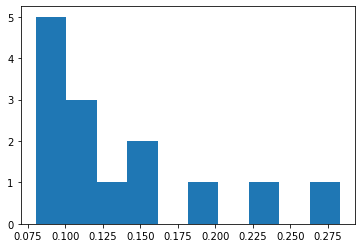

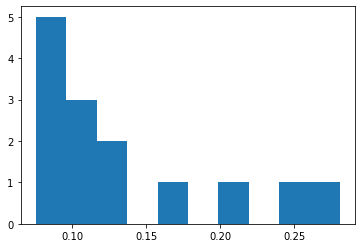

In [23]:
#################################################
# objects
obj_names = ['SDSSJ0029-0055',
             'SDSSJ0037-0942',
             'SDSSJ0330-0020',
             'SDSSJ1112+0826',
             'SDSSJ1204+0358',
             'SDSSJ1250+0523',
             'SDSSJ1306+0600',
             'SDSSJ1402+6321',
             'SDSSJ1531-0105',
             'SDSSJ1538+5817',
             'SDSSJ1621+3931',
             'SDSSJ1627-0053',
             'SDSSJ1630+4520',
             'SDSSJ2303+1422'
            ]

V_sigmas = np.zeros(len(obj_names))
lambda_Rs = np.zeros(len(obj_names))
VD_ap_int_rms = np.zeros(len(obj_names)) # aperture integrated rms veldisp w/in effective radius

b=0

for obj_name in obj_names:
    
    #################
    # set up directories
    obj_abbr = obj_name[4:9] # e.g. J0029
    # data directory
    data_dir = '/data/raw_data/KECK_KCWI_SLACS_kinematics_shawn/'
    # object directory
    dir = f'{data_dir}mosaics/{obj_name}/'
    #KCWI mosaic datacube
    name = f'KCWI_{obj_abbr}_icubes_mosaic_0.1457'
    save_dir = f'{dir}{obj_name}_systematics/'
    
    #################
    # get velocity and bin data 
    VD=np.genfromtxt(f'{dir}{obj_name}_final_kinematics/{obj_name}_VD_binned.txt',
                 delimiter=',')
    VD_cov = np.genfromtxt(f'{dir}{obj_name}_final_kinematics/{obj_name}_covariance_matrix_VD.txt',
                     delimiter=',')
    dVD = np.sqrt(np.diagonal(VD_cov)) # to have error bars
    V=np.genfromtxt(f'{dir}{obj_name}_final_kinematics/{obj_name}_V_binned.txt',
                     delimiter=',')
    # subtract the mean V
    V = V - np.mean(V)
    # import voronoi binning data (#bins, 5215), spectrum for each bin
    voronoi_binning_data = fits.getdata(dir +'voronoi_binning_' + name + '_data.fits')
    # import pixel data for bins
    vorbin_pixels = np.genfromtxt(f'{dir}voronoi_2d_binning_{name}_output.txt',
                 delimiter='')

    #################
    # sum each bin across all wavelengths to get bin luminosities
    bin_luminosities = np.zeros(len(V))
    for i in range(len(V)):
        lum = np.sum(voronoi_binning_data[i])
        bin_luminosities[i] = lum
        
    #################
    # get mean R for each bin by pixel positions
    R = calc_R (vorbin_pixels, len(V))
        
    #################
    # calculate V_sigma
    V_sigmas[b], VD_ap_int_rms[b], dVD_ap_int_rms = lum_weight_V_sigma ( V, VD, dVD, bin_luminosities )
    # calculate lambda_R
    lambda_Rs[b] = calc_lambda_R (V, VD, R, bin_luminosities)
    
    b = b+1
    
plt.figure()    
plt.hist(V_sigmas)
plt.figure()
plt.hist(lambda_Rs)


In [24]:
import pandas as pd

In [25]:
slacs_data = np.genfromtxt(f'{data_dir}slacs_tableA1.txt', delimiter='', dtype='U10')
slacs_data[:5]

array([['J0008-0004', '000802.96-', '0669-52559', '0.4400', '1.1924',
        '18.65', '86.7', '1.71', '0.313', '0.83', '27.3', '-99', '-99',
        '-9999', 'S', 'E', 'B-A-x', 'A', '0'],
       ['J0028-0929', '002817.87-', '0653-52145', '0.0565', '0.7146',
        '13.75', '92.8', '15.21', '0.346', '0.48', '78.9', '147', '7',
        '2.01', 'S', 'L', 'x-x-x', 'X', '0'],
       ['J0029-0055', '002907.77-', '0391-51782', '0.2270', '0.9313',
        '17.09', '76.3', '2.16', '0.310', '0.84', '26.6', '229', '18',
        '1.75', 'S', 'E', 'A-A-A', 'A', '0'],
       ['J0037-0942', '003753.21-', '0655-52162', '0.1955', '0.6322',
        '16.26', '120.5', '2.19', '0.326', '0.73', '11.4', '279', '14',
        '2.00', 'S', 'E', 'A-A-A', 'A', '0'],
       ['J0044+0113', '004402.90+', '0393-51794', '0.1196', '0.1965',
        '15.73', '68.8', '2.61', '0.321', '0.76', '151.3', '266', '13',
        '1.67', 'S', 'E', 'A-A-A', 'A', '0']], dtype='<U10')

In [26]:
slacs_data

array([['J0008-0004', '000802.96-', '0669-52559', ..., 'B-A-x', 'A', '0'],
       ['J0028-0929', '002817.87-', '0653-52145', ..., 'x-x-x', 'X', '0'],
       ['J0029-0055', '002907.77-', '0391-51782', ..., 'A-A-A', 'A', '0'],
       ...,
       ['J2321-0939', '232120.93-', '0645-52203', ..., 'A-A-A', 'A', '0'],
       ['J2341+0000', '234111.57+', '0682-52525', ..., 'A-A-A', 'A', '0'],
       ['J2347-0005', '234728.08-', '0684-52523', ..., 'B-A-A', 'B', '0']],
      dtype='<U10')

In [27]:
slacs_qs = slacs_data[:,9].astype(float)
slacs_reffs = slacs_data[:,7].astype(float)
slacs_morphologies = slacs_data[:,15].astype(str)
slacs_sigmas = slacs_data[:,11].astype(float)
slacs_sigmas_err = slacs_data[:,12].astype(float)

In [28]:
ellipticities = np.empty(len(obj_names))
reffs = np.empty(len(obj_names))
morphologies = np.empty(len(obj_names), dtype=str)
sdss_sigmas = np.empty(len(obj_names))
sdss_sigmas_err = np.empty(len(obj_names))

for i in range(len(obj_names)):
    name = obj_names[i]
    name = name[4:]
    if name == 'J1306+0600':
        ellipticities[i] = 1 - 0.909 # These values from Shajib 2020
        reffs[i] = 2.30
        morphologies[i] = ''
        sdss_sigmas[i] = 0
        sdss_sigmas_err[i] = 0
    else:
        q = slacs_qs[slacs_data[:,0]==name]
        ellipticities[i] = 1 - q[0]
        reffs[i] = slacs_reffs[slacs_data[:,0]==name]
        morphologies[i] = slacs_morphologies[slacs_data[:,0]==name][0]
        sdss_sigmas[i] = slacs_sigmas[slacs_data[:,0]==name]
        sdss_sigmas_err[i] = slacs_sigmas_err[slacs_data[:,0]==name]

In [29]:
morphologies

array(['E', 'E', 'E', 'E', 'E', 'E', '', 'E', 'E', 'E', 'E', 'E', 'E',
       'E'], dtype='<U1')

# All are listed as early-type

In [30]:
def calc_Vsig_to_lamR (V_sigma):
    k = 1.1
    numerator = k * V_sigma
    denominator = np.sqrt(1 + k**2 * V_sigma**2)
    lamR = numerator/denominator
    return lamR

In [31]:
V_sigmas

array([0.11207741, 0.19193151, 0.14448807, 0.28337142, 0.08016957,
       0.15495014, 0.11004297, 0.09662315, 0.08018216, 0.10181765,
       0.24134413, 0.08844863, 0.12160354, 0.08337562])

In [32]:
V_sigmas = V_sigmas[ellipticities > 0]
lambda_Rs = lambda_Rs[ellipticities > 0]
ellipticities = ellipticities[ellipticities > 0]

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in double_scalars
  from ipykernel import kernelapp as app
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in double_scalars
  if sys.path[0] == '':
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in double_scalars
  


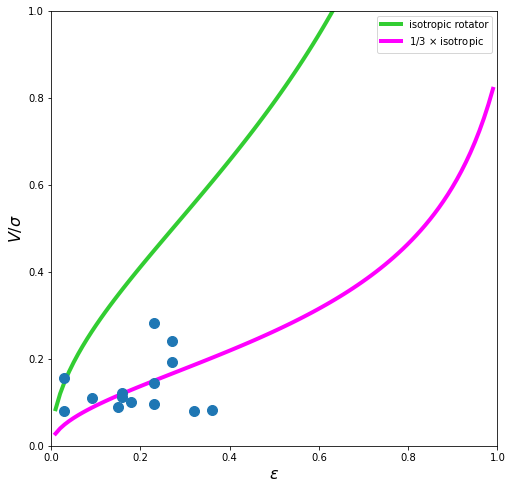

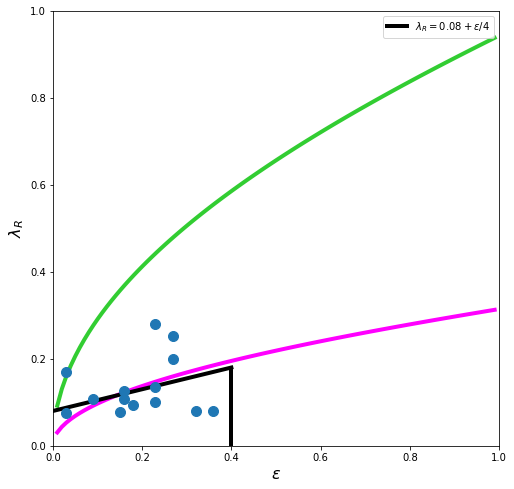

In [33]:
# plot the V_sigma and lambda_R to ellipticities

epsilons = np.linspace(0.0,1.0,100)
V_sigmas_iso = np.zeros(100)
lambda_Rs_iso = np.zeros(100)

i=0
for epsilon in epsilons:
    V_sigma = calc_isotropic_V_sigma(epsilon)
    V_sigmas_iso[i] = V_sigma
    lambda_Rs_iso[i] = calc_Vsig_to_lamR(V_sigma)
    i = i+1


plt.figure(figsize=(8,8))
plt.xlim(0.0,1.0)
plt.ylim(0.0,1.0)
plt.plot(epsilons, V_sigmas_iso, 
         c='limegreen',linewidth=4,zorder=-1,
        label='isotropic rotator')
plt.plot(epsilons, 1/3 * V_sigmas_iso, 
         c='magenta',linewidth=4,zorder=-1,
        label=r'1/3 $\times$ isotropic')
plt.scatter(ellipticities, V_sigmas, s=100)
plt.xlabel(r'$\epsilon$',fontsize=16)
plt.ylabel(r'$V/\sigma$',fontsize=16)
plt.legend()


plt.figure(figsize=(8,8))
plt.xlim(0.0,1.0)
plt.ylim(0.0,1.0)
plt.plot(epsilons, lambda_Rs_iso, c='limegreen',linewidth=4,zorder=-1)
plt.plot(epsilons, 1/3 * lambda_Rs_iso, c='magenta',linewidth=4,zorder=-1)
plt.plot([0.0, 0.4],[0.08, 0.08+0.4/4],
         linestyle='-',c='k',linewidth=4,zorder=-1)
plt.plot([0.4, 0.4],[0.0, 0.08+0.4/4],
         linestyle='-',c='k',linewidth=4,zorder=-1,
        label=r'$\lambda_R = 0.08 + \epsilon/4$')
plt.scatter(ellipticities, lambda_Rs, s=100)
plt.xlabel(r'$\epsilon$',fontsize=16)
plt.ylabel(r'$\lambda_R$',fontsize=16)
plt.legend()

In [34]:
np.vstack((ellipticities, V_sigmas, lambda_Rs))

array([[0.16      , 0.27      , 0.23      , 0.23      , 0.03      ,
        0.03      , 0.091     , 0.23      , 0.32      , 0.18      ,
        0.27      , 0.15      , 0.16      , 0.36      ],
       [0.11207741, 0.19193151, 0.14448807, 0.28337142, 0.08016957,
        0.15495014, 0.11004297, 0.09662315, 0.08018216, 0.10181765,
        0.24134413, 0.08844863, 0.12160354, 0.08337562],
       [0.10867334, 0.19998203, 0.13448152, 0.28119547, 0.07523905,
        0.17003366, 0.10822951, 0.10100174, 0.08074321, 0.09362663,
        0.25352513, 0.07872223, 0.12681699, 0.08089614]])

# Above was all done without taking the effective radius as the boundary for integration. Let's see if it makes a difference

length before cutting... 193
length after cutting... 187

length before cutting... 303
length after cutting... 281

length before cutting... 12
length after cutting... 7

length before cutting... 18
length after cutting... 18

length before cutting... 99
length after cutting... 84

length before cutting... 65
length after cutting... 53

length before cutting... 64
length after cutting... 64

length before cutting... 108
length after cutting... 108

length before cutting... 39
length after cutting... 39

length before cutting... 45
length after cutting... 34

length before cutting... 37
length after cutting... 37

length before cutting... 71
length after cutting... 66

length before cutting... 52
length after cutting... 48

length before cutting... 54
length after cutting... 54



(array([1., 5., 5., 0., 0., 1., 0., 0., 1., 1.]),
 array([0.04463938, 0.06829499, 0.0919506 , 0.11560621, 0.13926182,
        0.16291743, 0.18657304, 0.21022864, 0.23388425, 0.25753986,
        0.28119547]),
 <BarContainer object of 10 artists>)

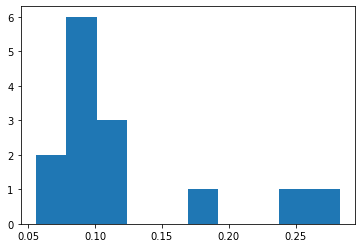

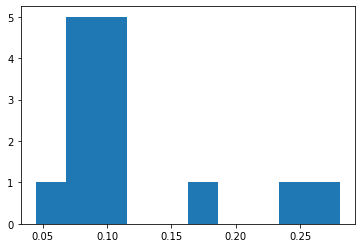

In [35]:
#################################################
# objects
obj_names = ['SDSSJ0029-0055',
             'SDSSJ0037-0942',
             'SDSSJ0330-0020',
             'SDSSJ1112+0826',
             'SDSSJ1204+0358',
             'SDSSJ1250+0523',
             'SDSSJ1306+0600',
             'SDSSJ1402+6321',
             'SDSSJ1531-0105',
             'SDSSJ1538+5817',
             'SDSSJ1621+3931',
             'SDSSJ1627-0053',
             'SDSSJ1630+4520',
             'SDSSJ2303+1422'
            ]

V_sigmas = np.zeros(len(obj_names))
lambda_Rs = np.zeros(len(obj_names))
VD_ap_int_rms = np.zeros(len(obj_names))
dVD_ap_int_rms = np.zeros(len(obj_names))

b=0

for obj_name in obj_names:
       
    #################
    # set up directories
    obj_abbr = obj_name[4:9] # e.g. J0029
    # data directory
    data_dir = '/data/raw_data/KECK_KCWI_SLACS_kinematics_shawn/'
    # object directory
    dir = f'{data_dir}mosaics/{obj_name}/'
    #KCWI mosaic datacube
    name = f'KCWI_{obj_abbr}_icubes_mosaic_0.1457'
    save_dir = f'{dir}{obj_name}_systematics/'

    #################
    # get velocity and bin data 
    VD=np.genfromtxt(f'{dir}{obj_name}_final_kinematics/{obj_name}_VD_binned.txt',
             delimiter=',')
    VD_cov = np.genfromtxt(f'{dir}{obj_name}_final_kinematics/{obj_name}_covariance_matrix_VD.txt',
                     delimiter=',')
    dVD = np.sqrt(np.diagonal(VD_cov))
    V=np.genfromtxt(f'{dir}{obj_name}_final_kinematics/{obj_name}_V_binned.txt',
                     delimiter=',')
    # subtract the mean V
    V = V - np.mean(V)
    # import voronoi binning data (#bins, 5215), spectrum for each bin
    voronoi_binning_data = fits.getdata(dir +'voronoi_binning_' + name + '_data.fits')
    # import pixel data for bins
    vorbin_pixels = np.genfromtxt(f'{dir}voronoi_2d_binning_{name}_output.txt',
                 delimiter='')
    #################
    # sum each bin across all wavelengths to get bin luminosities
    bin_luminosities = np.zeros(len(V))
    for i in range(len(V)):
        lum = np.sum(voronoi_binning_data[i])
        bin_luminosities[i] = lum
        
    # get pixel luminosities
    # calculate pixel luminosities
    #pixel_luminosities = np.zeros(len(vorbin_pixels))
    #for i in range(len(vorbin_pixels)):
    #    x = int(vorbin_pixels[i,0])                      ###### For future, better calculation by weighting only the *pixels* within the effective radius
    #    y = int(vorbin_pixels[i,1])
    #    pixel_luminosity = summed_datacube[y,x]
    #    pixel_luminosities[i] = pixel_luminosity 
        

    #################
    # get mean R for each bin by pixel positions
    short_name = obj_name[4:]
    R = calc_R (vorbin_pixels, len(V))
    print(f'length before cutting... {len(R)}')
    effective_radius = reffs[b]
    condition = R < effective_radius
    R = R[condition]
    V = V[condition]
    VD = VD[condition]
    dVD = dVD[condition]
    bin_luminosities = bin_luminosities[condition]
    print(f'length after cutting... {len(R)}')
    print()

    #################
    # calculate V_sigma
    V_sigmas[b], VD_ap_int_rms[b], dVD_ap_int_rms[b] = lum_weight_V_sigma ( V, VD, dVD, bin_luminosities )
    # calculate lambda_R
    lambda_Rs[b] = calc_lambda_R (V, VD, R, bin_luminosities)

    b = b+1
    
plt.figure()    
plt.hist(V_sigmas)
plt.figure()
plt.hist(lambda_Rs)


In [36]:
save_dir

'/data/raw_data/KECK_KCWI_SLACS_kinematics_shawn/mosaics/SDSSJ2303+1422/SDSSJ2303+1422_systematics/'

In [37]:
V_sigmas = V_sigmas[ellipticities > 0]
lambda_Rs = lambda_Rs[ellipticities > 0]
ellipticities = ellipticities[ellipticities > 0]

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in double_scalars
  from ipykernel import kernelapp as app
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in double_scalars
  if sys.path[0] == '':
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in double_scalars
  


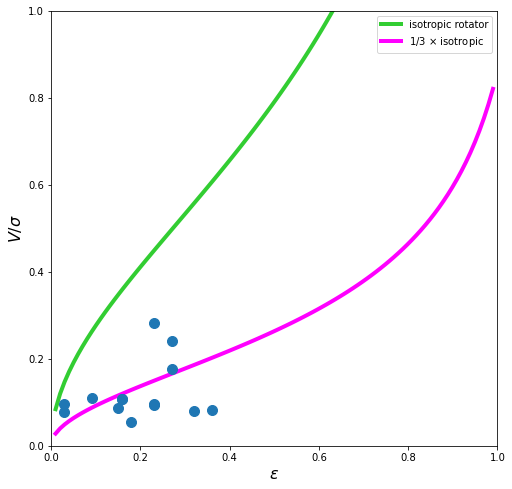

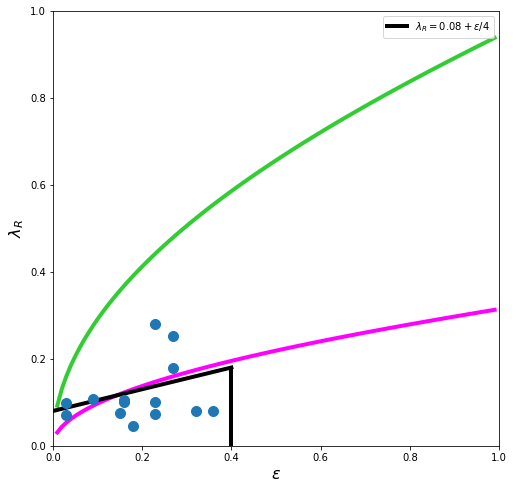

In [38]:
# plot the V_sigma and lambda_R to ellipticities


epsilons = np.linspace(0.0,1.0,100)
V_sigmas_iso = np.zeros(100)
lambda_Rs_iso = np.zeros(100)

i=0
for epsilon in epsilons:
    V_sigma = calc_isotropic_V_sigma(epsilon)
    V_sigmas_iso[i] = V_sigma
    lambda_Rs_iso[i] = calc_Vsig_to_lamR(V_sigma)
    i = i+1


plt.figure(figsize=(8,8))
plt.xlim(0.0,1.0)
plt.ylim(0.0,1.0)
plt.plot(epsilons, V_sigmas_iso, 
         c='limegreen',linewidth=4,zorder=-1,
        label='isotropic rotator')
plt.plot(epsilons, 1/3 * V_sigmas_iso, 
         c='magenta',linewidth=4,zorder=-1,
        label=r'1/3 $\times$ isotropic')
plt.scatter(ellipticities, V_sigmas, s=100)
plt.xlabel(r'$\epsilon$',fontsize=16)
plt.ylabel(r'$V/\sigma$',fontsize=16)
plt.legend()
plt.savefig(f'{data_dir}mosaics/kinematic_class_vsigma.png')
plt.savefig(f'{data_dir}mosaics/kinematic_class_vsigma.pdf')


plt.figure(figsize=(8,8))
plt.xlim(0.0,1.0)
plt.ylim(0.0,1.0)
plt.plot(epsilons, lambda_Rs_iso, c='limegreen',linewidth=4,zorder=-1)
plt.plot(epsilons, 1/3 * lambda_Rs_iso, c='magenta',linewidth=4,zorder=-1)
plt.plot([0.0, 0.4],[0.08, 0.08+0.4/4],
         linestyle='-',c='k',linewidth=4,zorder=-1)
plt.plot([0.4, 0.4],[0.0, 0.08+0.4/4],
         linestyle='-',c='k',linewidth=4,zorder=-1,
        label=r'$\lambda_R = 0.08 + \epsilon/4$')
plt.scatter(ellipticities, lambda_Rs, s=100)
plt.xlabel(r'$\epsilon$',fontsize=16)
plt.ylabel(r'$\lambda_R$',fontsize=16)
plt.legend()
plt.savefig(f'{data_dir}mosaics/kinematic_class_lambdar.png')
plt.savefig(f'{data_dir}mosaics/kinematic_class_lambdar.pdf')

In [39]:
#obj_names_a = np.array(obj_names)
#obj_names_a = np.delete(obj_names_a, 6)

In [40]:
#obj_names_a[lambda_Rs>0.17]

In [41]:
lambda_Rs[lambda_Rs>0.17]

array([0.1777557 , 0.28119547, 0.25352513])

In [42]:
lambda_Rs

array([0.10038901, 0.1777557 , 0.07339927, 0.28119547, 0.07030964,
       0.09800887, 0.10822951, 0.10100174, 0.08074321, 0.04463938,
       0.25352513, 0.07437719, 0.10584494, 0.08089614])

In [43]:
ellipticities

array([0.16 , 0.27 , 0.23 , 0.23 , 0.03 , 0.03 , 0.091, 0.23 , 0.32 ,
       0.18 , 0.27 , 0.15 , 0.16 , 0.36 ])

In [44]:
obj_names

['SDSSJ0029-0055',
 'SDSSJ0037-0942',
 'SDSSJ0330-0020',
 'SDSSJ1112+0826',
 'SDSSJ1204+0358',
 'SDSSJ1250+0523',
 'SDSSJ1306+0600',
 'SDSSJ1402+6321',
 'SDSSJ1531-0105',
 'SDSSJ1538+5817',
 'SDSSJ1621+3931',
 'SDSSJ1627-0053',
 'SDSSJ1630+4520',
 'SDSSJ2303+1422']

In [45]:
# Get the SDSS sigma (not corrected)

In [46]:
sdss_sigmas

array([229., 279., 212., 320., 267., 252.,   0., 267., 279., 189., 236.,
       290., 276., 255.])

In [47]:
VD_ap_int_rms

array([199.36699242, 259.19827888, 227.74603688, 255.24973187,
       246.69221146, 228.07360863, 224.65994837, 266.47704382,
       254.15471111, 228.4114471 , 241.51338048, 254.50388677,
       250.2633312 , 244.37378391])

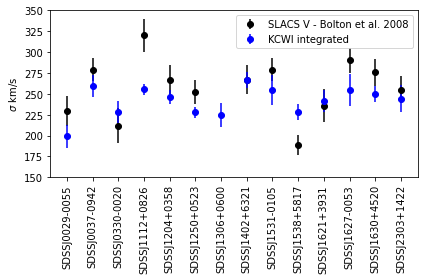

In [48]:
plt.figure()
plt.errorbar(range(len(sdss_sigmas)), sdss_sigmas, sdss_sigmas_err, c='k', linestyle='', marker='o', label='SLACS V - Bolton et al. 2008')
plt.errorbar(range(len(sdss_sigmas)), VD_ap_int_rms, dVD_ap_int_rms, c='b', linestyle='', marker='o', label='KCWI integrated')
plt.ylim(150, 350)
plt.legend()
plt.xticks(range(14),labels=obj_names, rotation=90)
plt.ylabel(r'$\sigma$ km/s')
plt.tight_layout()
plt.savefig(f'{data_dir}mosaics/integrated_sigma_vs_slacs.png')
plt.savefig(f'{data_dir}mosaics/integrated_sigma_vs_slacs.pdf')

In [49]:
# combine info for a table

In [50]:
np.set_printoptions(precision=3, suppress=True)

VD_ap_int_rms

array([199.367, 259.198, 227.746, 255.25 , 246.692, 228.074, 224.66 ,
       266.477, 254.155, 228.411, 241.513, 254.504, 250.263, 244.374])

In [51]:
table = np.vstack((VD_ap_int_rms, dVD_ap_int_rms, sdss_sigmas, sdss_sigmas_err, ellipticities, V_sigmas, lambda_Rs))
df = pd.DataFrame(table.T)
df.insert(0, 'obj_names', obj_names, True)
#df.to_numpy()

In [52]:
def bmatrix(a, b):
    """Returns a LaTeX bmatrix

    :a: numpy array
    :returns: LaTeX bmatrix as a string
    """
    if len(a.shape) > 2:
        raise ValueError('bmatrix can at most display two dimensions')
    lines = str(a).replace('[', '').replace(']', '').splitlines()
    rv = [r'\begin{bmatrix}']
    rv += [b[i] + ' & ' + ' & '.join(lines[i].split()) + r'\\' for i in range(len(lines))]
    rv +=  [r'\end{bmatrix}']
    return '\n'.join(rv)

In [53]:
print(bmatrix(table.T, obj_names))

\begin{bmatrix}
SDSSJ0029-0055 & 199.367 & 13.881 & 229. & 18. & 0.16 & 0.107 & 0.1\\
SDSSJ0037-0942 & 259.198 & 12.98 & 279. & 14. & 0.27 & 0.176 & 0.178\\
SDSSJ0330-0020 & 227.746 & 13.121 & 212. & 21. & 0.23 & 0.094 & 0.073\\
SDSSJ1112+0826 & 255.25 & 6.799 & 320. & 20. & 0.23 & 0.283 & 0.281\\
SDSSJ1204+0358 & 246.692 & 8.316 & 267. & 17. & 0.03 & 0.078 & 0.07\\
SDSSJ1250+0523 & 228.074 & 6.552 & 252. & 14. & 0.03 & 0.097 & 0.098\\
SDSSJ1306+0600 & 224.66 & 14.157 & 0. & 0. & 0.091 & 0.11 & 0.108\\
SDSSJ1402+6321 & 266.477 & 9.517 & 267. & 17. & 0.23 & 0.097 & 0.101\\
SDSSJ1531-0105 & 254.155 & 18.07 & 279. & 14. & 0.32 & 0.08 & 0.081\\
SDSSJ1538+5817 & 228.411 & 9.362 & 189. & 12. & 0.18 & 0.056 & 0.045\\
SDSSJ1621+3931 & 241.513 & 12.678 & 236. & 20. & 0.27 & 0.241 & 0.254\\
SDSSJ1627-0053 & 254.504 & 19.166 & 290. & 15. & 0.15 & 0.086 & 0.074\\
SDSSJ1630+4520 & 250.263 & 9.64 & 276. & 16. & 0.16 & 0.107 & 0.106\\
SDSSJ2303+1422 & 244.374 & 16.478 & 255. & 16. & 0.36 & 0.083 & 0.

In [54]:
# classification according to the Cappellari paper

V_sig_class = np.empty(14, dtype=str)
lam_R_class = np.empty(14, dtype=str)

for i in range(14):
    
    print(obj_names[i])
    
    V_sig = V_sigmas[i]
    lam_R = lambda_Rs[i]
    ellip = ellipticities[i]
    
    V_sig_bound = calc_isotropic_V_sigma(ellip) / 3
    lam_R_bound = 0.08 + ellip/4
    
    if (V_sig < V_sig_bound):
        V_sig_class[i] = 'slow'
    elif (V_sig > V_sig_bound):
        V_sig_class[i] = 'fast'
    
    if (lam_R < lam_R_bound):
        lam_R_class[i] = 'slow'
    elif (lam_R > lam_R_bound):
        lam_R_class[i] = 'fast'
        
    print(V_sig_class[i], lam_R_class[i])
    
    print()

SDSSJ0029-0055
s s

SDSSJ0037-0942
f f

SDSSJ0330-0020
s s

SDSSJ1112+0826
f f

SDSSJ1204+0358
f s

SDSSJ1250+0523
f f

SDSSJ1306+0600
f f

SDSSJ1402+6321
s s

SDSSJ1531-0105
s s

SDSSJ1538+5817
s s

SDSSJ1621+3931
f f

SDSSJ1627-0053
s s

SDSSJ1630+4520
s s

SDSSJ2303+1422
s s



In [55]:
V_sig_class

array(['s', 'f', 's', 'f', 'f', 'f', 'f', 's', 's', 's', 'f', 's', 's',
       's'], dtype='<U1')

In [56]:
lam_R_class

array(['s', 'f', 's', 'f', 's', 'f', 'f', 's', 's', 's', 'f', 's', 's',
       's'], dtype='<U1')

In [57]:
def bmatrix(a, b, c, d):
    """Returns a LaTeX bmatrix

    :a: numpy array
    :returns: LaTeX bmatrix as a string
    """
    if len(a.shape) > 2:
        raise ValueError('bmatrix can at most display two dimensions')
    lines = str(a).replace('[', '').replace(']', '').splitlines()
    rv = [r'\begin{bmatrix}']
    rv += [b[i] + ' & ' + ' & '.join(lines[i].split()) + ' & ' + c[i] + ' & ' + d[i] + r'\\' for i in range(len(lines))]
    rv +=  [r'\end{bmatrix}']
    return '\n'.join(rv)

In [58]:
print(bmatrix(table.T, obj_names, V_sig_class, lam_R_class))

\begin{bmatrix}
SDSSJ0029-0055 & 199.367 & 13.881 & 229. & 18. & 0.16 & 0.107 & 0.1 & s & s\\
SDSSJ0037-0942 & 259.198 & 12.98 & 279. & 14. & 0.27 & 0.176 & 0.178 & f & f\\
SDSSJ0330-0020 & 227.746 & 13.121 & 212. & 21. & 0.23 & 0.094 & 0.073 & s & s\\
SDSSJ1112+0826 & 255.25 & 6.799 & 320. & 20. & 0.23 & 0.283 & 0.281 & f & f\\
SDSSJ1204+0358 & 246.692 & 8.316 & 267. & 17. & 0.03 & 0.078 & 0.07 & f & s\\
SDSSJ1250+0523 & 228.074 & 6.552 & 252. & 14. & 0.03 & 0.097 & 0.098 & f & f\\
SDSSJ1306+0600 & 224.66 & 14.157 & 0. & 0. & 0.091 & 0.11 & 0.108 & f & f\\
SDSSJ1402+6321 & 266.477 & 9.517 & 267. & 17. & 0.23 & 0.097 & 0.101 & s & s\\
SDSSJ1531-0105 & 254.155 & 18.07 & 279. & 14. & 0.32 & 0.08 & 0.081 & s & s\\
SDSSJ1538+5817 & 228.411 & 9.362 & 189. & 12. & 0.18 & 0.056 & 0.045 & s & s\\
SDSSJ1621+3931 & 241.513 & 12.678 & 236. & 20. & 0.27 & 0.241 & 0.254 & f & f\\
SDSSJ1627-0053 & 254.504 & 19.166 & 290. & 15. & 0.15 & 0.086 & 0.074 & s & s\\
SDSSJ1630+4520 & 250.263 & 9.64 & 276. &

In [59]:
# plot fast and slow on the vsig and lamr plots

In [60]:
slow1 = V_sig_class == 's'
fast1 = V_sig_class == 'f'
slow2 = lam_R_class == 's'
fast2 = lam_R_class == 'f'

eps_slow1 = ellipticities[slow1]
V_sigmas_slow = V_sigmas[slow1]
eps_fast1 = ellipticities[fast1]
V_sigmas_fast = V_sigmas[fast1]

eps_slow2 = ellipticities[slow2]
lambda_Rs_slow = lambda_Rs[slow2]
eps_fast2 = ellipticities[fast2]
lambda_Rs_fast = lambda_Rs[fast2]

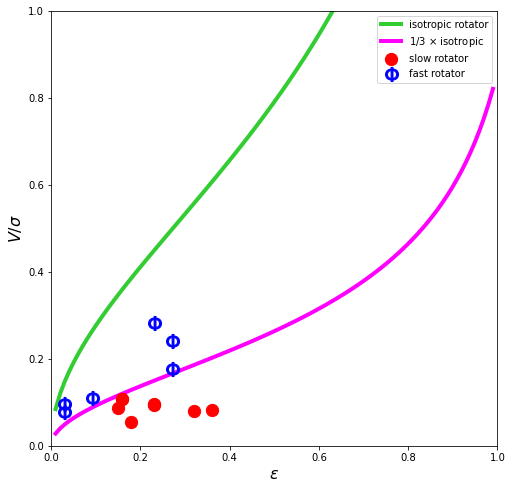

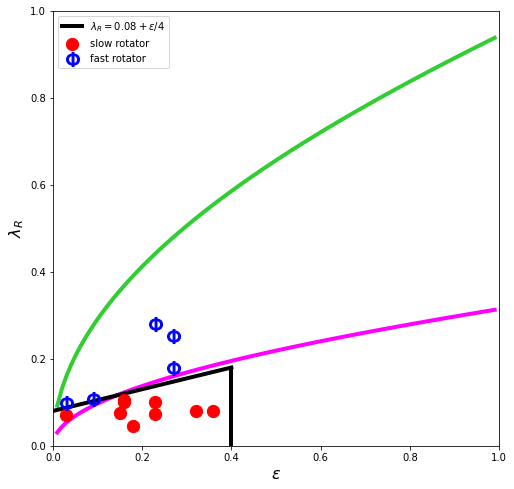

In [61]:
# plot the V_sigma and lambda_R to ellipticities

plt.figure(figsize=(8,8))
plt.xlim(0.0,1.0)
plt.ylim(0.0,1.0)
plt.plot(epsilons, V_sigmas_iso, 
         c='limegreen',linewidth=4,zorder=-1,
        label='isotropic rotator')
plt.plot(epsilons, 1/3 * V_sigmas_iso, 
         c='magenta',linewidth=4,zorder=-1,
        label=r'1/3 $\times$ isotropic')
plt.scatter(eps_slow1, V_sigmas_slow, s=150, c='r', label='slow rotator')
plt.scatter(eps_fast1, V_sigmas_fast, s=200, c='b', marker='$\Phi$', label='fast rotator')
plt.xlabel(r'$\epsilon$',fontsize=16)
plt.ylabel(r'$V/\sigma$',fontsize=16)
plt.legend()
plt.savefig(f'{data_dir}mosaics/kinematic_class_vsigma.png')
plt.savefig(f'{data_dir}mosaics/kinematic_class_vsigma.pdf')


plt.figure(figsize=(8,8))
plt.xlim(0.0,1.0)
plt.ylim(0.0,1.0)
plt.plot(epsilons, lambda_Rs_iso, c='limegreen',linewidth=4,zorder=-1)
plt.plot(epsilons, 1/3 * lambda_Rs_iso, c='magenta',linewidth=4,zorder=-1)
plt.plot([0.0, 0.4],[0.08, 0.08+0.4/4],
         linestyle='-',c='k',linewidth=4,zorder=-1)
plt.plot([0.4, 0.4],[0.0, 0.08+0.4/4],
         linestyle='-',c='k',linewidth=4,zorder=-1,
        label=r'$\lambda_R = 0.08 + \epsilon/4$')
plt.scatter(eps_slow2, lambda_Rs_slow, s=150, c='r', label='slow rotator')
plt.scatter(eps_fast2, lambda_Rs_fast, s=200, c='b', marker='$\Phi$', label='fast rotator')
plt.xlabel(r'$\epsilon$',fontsize=16)
plt.ylabel(r'$\lambda_R$',fontsize=16)
plt.legend()
plt.savefig(f'{data_dir}mosaics/kinematic_class_lambdar.png')
plt.savefig(f'{data_dir}mosaics/kinematic_class_lambdar.pdf')

__________________________________
# 09/30/22 - Do similar analysis but integrate with luminosity weighted pixel contributions, like I did for the rebinning for the 1D velocity profiles in "2d_to_1d_milestone_092722.ipynb"

In [12]:
# Define function to calculate luminosity weights for rebinning from Voronoi bins to shells
### In this case, the shell will justbe the effective radius (shells = [1])

def calc_luminosity_weights_in_shells (bin_arrays, num_bins, bin_luminosities, pixel_luminosities, shells, reff):
    
    # create array with each bin and len num_bins
    luminosity_weights = np.zeros((num_bins, len(shells)))
    
    for i in range(num_bins):
        # pixels in this bin, take x and y coordinates
        in_bin = bin_arrays[:,2]==i
        bin_pixels = bin_arrays[in_bin]
        bin_xx = bin_pixels[:,0] - 21 # subtract 21 pixels, center don't know which is x and which is y, but doesn't matter for R
        bin_yy = bin_pixels[:,1] - 21
        # luminosity of bin and of pixels in bin
        bin_luminosity = bin_luminosities[i]
        bin_pixels_lum = pixel_luminosities[in_bin]
        #print(bin_luminosity, np.sum(bin_pixels_lum))
        # calculate radius of each pixel in the bin
        bin_R = np.zeros(len(bin_pixels))
        for j in range(len(bin_pixels)):
            bin_R[j] = np.sqrt(bin_xx[j]**2 + bin_yy[j]**2)*0.1457 # arcsec
        # calculate fraction of these pixels in each shell
        for k in range(len(shells)):
            inner_shell = shells[k]
            if k == len(shells) - 1:
                outer_shell = 10 # everything extending to the farthest pixel
            else:
                outer_shell = shells[k+1]
            in_shell = (bin_R >= inner_shell*reff) & (bin_R <= outer_shell*reff)
            # weight pixels by fractional luminosity of total bin
            bin_luminosity_in_shell = np.sum(bin_pixels_lum[in_shell])#/bin_luminosity
            luminosity_weights[i,k] = bin_luminosity_in_shell
        
    return luminosity_weights

In [13]:
def lum_weight_bin (V, VD, dVD, lum):
    
    bin_weighted_V_sq = lum * V**2
    bin_weighted_VD_sq = lum * VD**2
    bin_weighted_dVD_sq = lum * 2 * VD * dVD

    return bin_weighted_V_sq, bin_weighted_VD_sq, bin_weighted_dVD_sq

def lum_weight_V_sigma (V_array, VD_array, dVD_array, lum_array):
    
    assert (len(V_array)==len(VD_array)) & (len(V_array)==len(lum_array)) & (len(V_array)==len(dVD_array))
    
    V_sq = 0
    VD_sq = 0
    dVD_sq = 0
    
    for i in range(len(V_array)):
        bin_V_sq, bin_VD_sq, bin_dVD_sq = lum_weight_bin(V_array[i], VD_array[i], dVD_array[i], lum_array[i])
        V_sq += bin_V_sq
        VD_sq += bin_VD_sq
        dVD_sq += bin_dVD_sq
    
    V_sigma_sq = V_sq/VD_sq
    V_sigma = np.sqrt(V_sigma_sq)
    
    VD_integrated_rms = np.sqrt(VD_sq/np.sum(lum_array))

    dVD_int_rms = dVD_sq / (2 * np.sqrt(np.sum(lum_array) * VD_sq))
    
    return(V_sigma, VD_integrated_rms, dVD_int_rms) # this is integrated out to the edge of my data right now
        

In [14]:
# Now let's do the lambda_R calculation


def calc_lambda_R (V_array, VD_array, R_array, lum_array):
    
    assert (len(V_array)==len(VD_array)) & (len(V_array)==len(lum_array)) & (len(V_array)==len(R_array))
    
    numerator = 0
    denominator = 0
    
    for i in range(len(V_array)):
        V = V_array[i]
        VD = VD_array[i]
        lum = lum_array[i]
        R = R_array[i]
        
        
        num = lum * R * np.abs(V)
        den = lum * R * np.sqrt(V**2 + VD**2)
        
        numerator += num
        denominator += den
        
    lambda_R = numerator / denominator
    
    return lambda_R


In [15]:
# Define function to assign velocities to each pixel from their Voronoi bin, taking only those within the effective radius

def calc_aperture_velocities_from_lum_weight_pixels (bin_arrays, V_array, VD_array, dVD_array, pixel_luminosities, reff):
    
    # normalize pixel luminosities
    normalized_pixel_luminosities = pixel_luminosities/np.sum(pixel_luminosities)
    
    # create array for velocity of each pixel
    pixel_Vs = np.zeros(len(pixel_luminosities))
    pixel_VDs = np.zeros(len(pixel_luminosities))
    pixel_dVDs = np.zeros(len(pixel_luminosities))
    velocity_in_aperture = 0
    
    for i in range(num_bins):
        # pixels in this bin
        in_bin = bin_arrays[:,2]==i
        bin_pixels = bin_arrays[in_bin]
        # add velocity to the weighted_pixel_velocities
        pixel_Vs[in_bin] = V_array[i]
        pixel_VDs[in_bin] = VD_array[i]
        pixel_dVDs[in_bin] = dVD_array[i]       
        
    # get radius of pixels
    pixel_xx = bin_arrays[:,0] - 21 # subtract 21 pixels, center don't know which is x and which is y, but doesn't matter for R
    pixel_yy = bin_arrays[:,1] - 21
    # calculate radius of each pixel
    pixel_radii = np.sqrt(pixel_xx**2 + pixel_yy**2)*0.1457 # arcsec
    # if they are in the effective radius
    in_aperture = (pixel_radii <= reff)
    
    # weight squared pixel velocities by pixel luminosity
    lum_weighted_pixel_Vs_sq = pixel_Vs**2 * normalized_pixel_luminosities
    lum_weighted_pixel_VDs_sq = pixel_VDs**2 * normalized_pixel_luminosities
    lum_weighted_pixel_dVDs_sq = 2 * pixel_VDs * pixel_dVDs * normalized_pixel_luminosities
    
    # take only those in the effective radius                                                   
    lum_weighted_aperture_V = np.sqrt(np.sum(lum_weighted_pixel_Vs_sq[in_aperture]))
    lum_weighted_aperture_VD = np.sqrt(np.sum(lum_weighted_pixel_VDs_sq[in_aperture]))
    lum_weighted_aperture_dVD = np.sum(lum_weighted_pixel_dVDs_sq[in_aperture]) / (2 * np.sqrt(np.sum(lum_weighted_pixel_VDs_sq[in_aperture])))
    
    # calculate V/sigma
    V_sigma = lum_weighted_aperture_V/lum_weighted_aperture_VD
    
    # calculate lambda_R
    numerator = np.sum(pixel_radii[in_aperture] * normalized_pixel_luminosities[in_aperture] * np.sqrt( lum_weighted_pixel_Vs_sq[in_aperture]))
    denominator = np.sum(pixel_radii[in_aperture] * normalized_pixel_luminosities[in_aperture] * np.sqrt( lum_weighted_pixel_Vs_sq[in_aperture] +  lum_weighted_pixel_VDs_sq[in_aperture]))
    lambda_R = numerator / denominator

    
    return V_sigma, lambda_R, lum_weighted_aperture_V, lum_weighted_aperture_VD, lum_weighted_aperture_dVD

length before cutting... 193
length after cutting... 187
length before cutting... 303
length after cutting... 281
length before cutting... 12
length after cutting... 7
length before cutting... 18
length after cutting... 18
length before cutting... 99
length after cutting... 84
length before cutting... 65
length after cutting... 53
length before cutting... 64
length after cutting... 64
length before cutting... 108
length after cutting... 108
length before cutting... 39
length after cutting... 39
length before cutting... 45
length after cutting... 34
length before cutting... 37
length after cutting... 37
length before cutting... 71
length after cutting... 66
length before cutting... 52
length after cutting... 48
length before cutting... 54
length after cutting... 54
here
[0.107 0.176 0.094 0.283 0.078 0.097 0.11  0.097 0.08  0.056 0.241 0.086
 0.107 0.083] [0.108 0.176 0.129 0.263 0.078 0.128 0.109 0.096 0.079 0.065 0.235 0.088
 0.114 0.083]


(array([1., 6., 2., 2., 0., 1., 0., 0., 0., 2.]),
 array([0.05 , 0.068, 0.087, 0.105, 0.124, 0.142, 0.16 , 0.179, 0.197,
        0.216, 0.234]),
 <BarContainer object of 10 artists>)

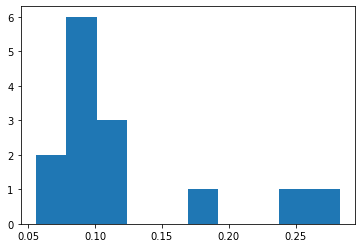

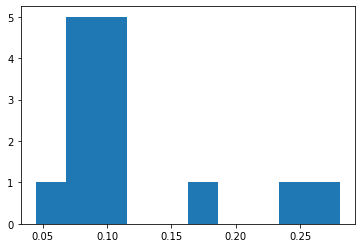

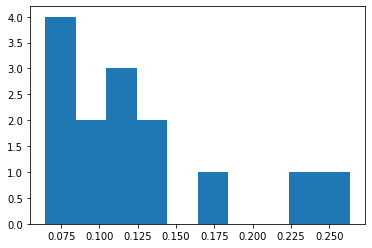

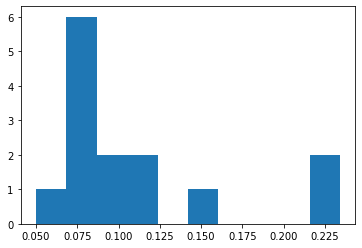

In [66]:
# plug in the extra steps of doing the integral over luminosity weighted pixels instead of just the bins. Will be more spatially accurate as an aperture of radius reff

#################################################
# objects
obj_names = ['SDSSJ0029-0055',
             'SDSSJ0037-0942',
             'SDSSJ0330-0020',
             'SDSSJ1112+0826',
             'SDSSJ1204+0358',
             'SDSSJ1250+0523',
             'SDSSJ1306+0600',
             'SDSSJ1402+6321',
             'SDSSJ1531-0105',
             'SDSSJ1538+5817',
             'SDSSJ1621+3931',
             'SDSSJ1627-0053',
             'SDSSJ1630+4520',
             'SDSSJ2303+1422'
            ]

V_sigmas_bin_method = np.zeros(len(obj_names))
lambda_Rs_bin_method = np.zeros(len(obj_names))
VD_ap_int_rms_bin_method = np.zeros(len(obj_names))
dVD_ap_int_rms_bin_method = np.zeros(len(obj_names))

V_sigmas_pixel_method = np.zeros(len(obj_names))
lambda_Rs_pixel_method = np.zeros(len(obj_names))
VD_ap_int_rms_pixel_method = np.zeros(len(obj_names))
V_ap_int_rms_pixel_method = np.zeros(len(obj_names))
dVD_ap_int_rms_pixel_method = np.zeros(len(obj_names))

b=0

for obj_name in obj_names:
       
    #################
    # set up directories
    obj_abbr = obj_name[4:9] # e.g. J0029
    # data directory
    data_dir = '/data/raw_data/KECK_KCWI_SLACS_kinematics_shawn/'
    # object directory
    dir = f'{data_dir}mosaics/{obj_name}/'
    #KCWI mosaic datacube
    name = f'KCWI_{obj_abbr}_icubes_mosaic_0.1457'
    save_dir = f'{dir}{obj_name}_systematics/'

    #################
    # get velocity and bin data 
    VD=np.genfromtxt(f'{dir}{obj_name}_final_kinematics/{obj_name}_VD_binned.txt',
             delimiter=',')
    VD_cov = np.genfromtxt(f'{dir}{obj_name}_final_kinematics/{obj_name}_covariance_matrix_VD.txt',
                     delimiter=',')
    dVD = np.sqrt(np.diagonal(VD_cov))
    V=np.genfromtxt(f'{dir}{obj_name}_final_kinematics/{obj_name}_V_binned.txt',
                     delimiter=',')
    # subtract the mean V
    V = V - np.mean(V)
    # import voronoi binning data (#bins, 5215), spectrum for each bin
    voronoi_binning_data = fits.getdata(dir +'voronoi_binning_' + name + '_data.fits')
    num_bins = len(voronoi_binning_data)
    # import pixel data for bins
    vorbin_pixels = np.genfromtxt(f'{dir}voronoi_2d_binning_{name}_output.txt',
                 delimiter='')
    
    #################
    # sum each bin across all wavelengths to get bin luminosities
    bin_luminosities = np.zeros(len(V))
    for i in range(len(V)):
        lum = np.sum(voronoi_binning_data[i])
        bin_luminosities[i] = lum
        

    #################
    # get mean R for each bin by pixel positions
    short_name = obj_name[4:]
    R = calc_R (vorbin_pixels, len(V))
    print(f'length before cutting... {len(R)}')
    effective_radius = reffs[b]
    condition = R < effective_radius
    R_in_aperture = R[condition]
    V_in_aperture = V[condition]
    VD_in_aperture = VD[condition]
    dVD_in_aperture = dVD[condition]
    bin_luminosities_in_aperture = bin_luminosities[condition]
    print(f'length after cutting... {len(R_in_aperture)}')
    #print()

    #################
    # calculate V_sigma
    V_sigmas_bin_method[b], VD_ap_int_rms_bin_method[b], dVD_ap_int_rms_bin_method[b] = lum_weight_V_sigma ( V_in_aperture, VD_in_aperture, dVD_in_aperture, bin_luminosities_in_aperture )
    # calculate lambda_R
    lambda_Rs_bin_method[b] = calc_lambda_R (V_in_aperture, VD_in_aperture, R_in_aperture, bin_luminosities_in_aperture)
    
    ###########################################
    # Now second method
    ###########################################
    
    # bring in cropped datacube and sum across wavelengths
    file = f'{dir}KCWI_{obj_abbr}_icubes_mosaic_0.1457_crop.fits'
    datacube = fits.open(file)[0].data
    summed_datacube = np.nansum(datacube, axis=0)
    normalized_summed_datacube = summed_datacube/np.sum(summed_datacube)
    
    # get effective radius
    if obj_name == 'SDSSJ1306+0600':
        reff = 2.30
    else:    
        # get reff from slacs table
        slacs_table = np.genfromtxt(f'{data_dir}slacs_tableA1.txt', delimiter='', dtype='U10')
        slacs_table_name = obj_name[4:]
        slacs_reffs = slacs_table[:,7].astype(float)
        reff = slacs_reffs[slacs_table[:,0]==slacs_table_name]
        
    # calculate pixel luminosities
    pixel_luminosities = np.zeros(len(vorbin_pixels))
    for i in range(len(vorbin_pixels)):
        x = int(vorbin_pixels[i,0])
        y = int(vorbin_pixels[i,1])
        pixel_luminosity = summed_datacube[y,x]
        pixel_luminosities[i] = pixel_luminosity

    # calculate luminosity weights for each bin contribution to the integrated velocities within the effective radius
    shells=[1.]
    luminosity_weights = calc_luminosity_weights_in_shells(vorbin_pixels, num_bins, bin_luminosities, pixel_luminosities, shells, reff)
    
    # calculate the luminosity-weighted mean V and VD for the aperture within the effective radius
    sum_lum_weights = np.sum(luminosity_weights, axis=0) # sum over the weights for the normalization
    normalized_lum_weights = luminosity_weights / sum_lum_weights
    
    # calculate V_sigma# calculate lambda_R
    V_sigmas_pixel_method[b], lambda_Rs_pixel_method[b], \
        V_ap_int_rms_pixel_method[b], VD_ap_int_rms_pixel_method[b], \
        dVD_ap_int_rms_pixel_method[b]  = calc_aperture_velocities_from_lum_weight_pixels(vorbin_pixels, V, VD, dVD, pixel_luminosities, reff)
    
    b=b+1
    
print('here')
print(V_sigmas_bin_method, V_sigmas_pixel_method)
    
plt.figure()    
plt.hist(V_sigmas_bin_method)
plt.figure()
plt.hist(lambda_Rs_bin_method)
    
plt.figure()    
plt.hist(V_sigmas_pixel_method)
plt.figure()
plt.hist(lambda_Rs_pixel_method)


In [67]:
save_dir

'/data/raw_data/KECK_KCWI_SLACS_kinematics_shawn/mosaics/SDSSJ2303+1422/SDSSJ2303+1422_systematics/'

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in double_scalars
  from ipykernel import kernelapp as app
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in double_scalars
  if sys.path[0] == '':
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in double_scalars
  


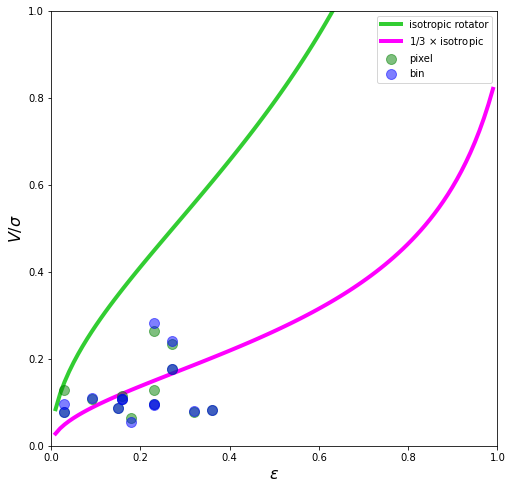

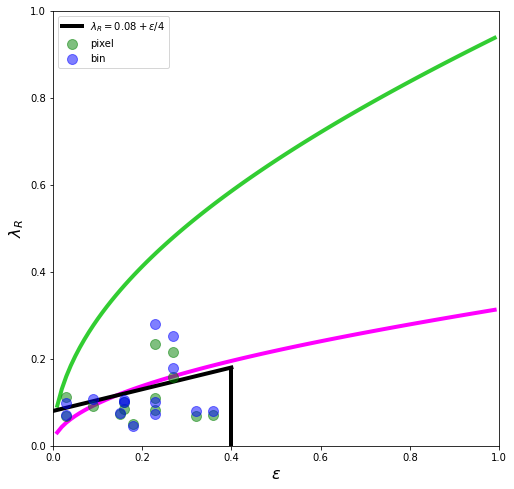

In [68]:
# plot the V_sigma and lambda_R to ellipticities


epsilons = np.linspace(0.0,1.0,100)
V_sigmas_iso = np.zeros(100)
lambda_Rs_iso = np.zeros(100)

i=0
for epsilon in epsilons:
    V_sigma = calc_isotropic_V_sigma(epsilon)
    V_sigmas_iso[i] = V_sigma
    lambda_Rs_iso[i] = calc_Vsig_to_lamR(V_sigma)
    i = i+1


plt.figure(figsize=(8,8))
plt.xlim(0.0,1.0)
plt.ylim(0.0,1.0)
plt.plot(epsilons, V_sigmas_iso, 
         c='limegreen',linewidth=4,zorder=-1,
        label='isotropic rotator')
plt.plot(epsilons, 1/3 * V_sigmas_iso, 
         c='magenta',linewidth=4,zorder=-1,
        label=r'1/3 $\times$ isotropic')
plt.scatter(ellipticities, V_sigmas_pixel_method, s=100, c='g', alpha=0.5, label='pixel')
plt.scatter(ellipticities, V_sigmas_bin_method, s=100, c='b', alpha=0.5, label='bin')
plt.xlabel(r'$\epsilon$',fontsize=16)
plt.ylabel(r'$V/\sigma$',fontsize=16)
plt.legend()
#plt.savefig(f'{data_dir}mosaics/kinematic_class_vsigma.png')
#plt.savefig(f'{data_dir}mosaics/kinematic_class_vsigma.pdf')


plt.figure(figsize=(8,8))
plt.xlim(0.0,1.0)
plt.ylim(0.0,1.0)
plt.plot(epsilons, lambda_Rs_iso, c='limegreen',linewidth=4,zorder=-1)
plt.plot(epsilons, 1/3 * lambda_Rs_iso, c='magenta',linewidth=4,zorder=-1)
plt.plot([0.0, 0.4],[0.08, 0.08+0.4/4],
         linestyle='-',c='k',linewidth=4,zorder=-1)
plt.plot([0.4, 0.4],[0.0, 0.08+0.4/4],
         linestyle='-',c='k',linewidth=4,zorder=-1,
        label=r'$\lambda_R = 0.08 + \epsilon/4$')
plt.scatter(ellipticities, lambda_Rs_pixel_method, s=100, c='g', alpha=0.5, label='pixel')
plt.scatter(ellipticities, lambda_Rs_bin_method, s=100, c='b', alpha=0.5, label='bin')
plt.xlabel(r'$\epsilon$',fontsize=16)
plt.ylabel(r'$\lambda_R$',fontsize=16)
plt.legend()
#plt.savefig(f'{data_dir}mosaics/kinematic_class_lambdar.png')
#plt.savefig(f'{data_dir}mosaics/kinematic_class_lambdar.pdf')

# I need to see how this changes things, but I think the pixel-weighted binning is best.

In [69]:
#obj_names_a[lambda_Rs>0.17]

In [70]:
lambda_Rs_pixel_method[lambda_Rs_pixel_method>0.17]

array([0.234, 0.217])

In [71]:
lambda_Rs_bin_method[lambda_Rs_bin_method>0.17]

array([0.178, 0.281, 0.254])

In [72]:
ellipticities

array([0.16 , 0.27 , 0.23 , 0.23 , 0.03 , 0.03 , 0.091, 0.23 , 0.32 ,
       0.18 , 0.27 , 0.15 , 0.16 , 0.36 ])

In [73]:
obj_names

['SDSSJ0029-0055',
 'SDSSJ0037-0942',
 'SDSSJ0330-0020',
 'SDSSJ1112+0826',
 'SDSSJ1204+0358',
 'SDSSJ1250+0523',
 'SDSSJ1306+0600',
 'SDSSJ1402+6321',
 'SDSSJ1531-0105',
 'SDSSJ1538+5817',
 'SDSSJ1621+3931',
 'SDSSJ1627-0053',
 'SDSSJ1630+4520',
 'SDSSJ2303+1422']

In [74]:
# Get the SDSS sigma (not corrected)

In [75]:
sdss_sigmas

array([229., 279., 212., 320., 267., 252.,   0., 267., 279., 189., 236.,
       290., 276., 255.])

In [76]:
VD_ap_int_rms_pixel_method

array([193.191, 243.939, 178.852, 245.712, 212.132, 203.061, 222.138,
       264.746, 252.226, 198.537, 237.939, 241.004, 234.352, 244.364])

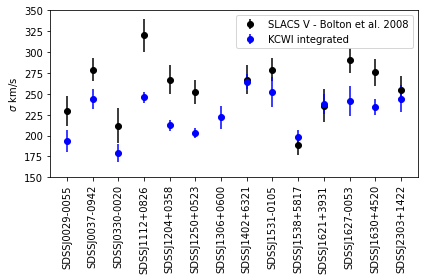

In [77]:
plt.figure()
plt.errorbar(range(len(sdss_sigmas)), sdss_sigmas, sdss_sigmas_err, c='k', linestyle='', marker='o', label='SLACS V - Bolton et al. 2008')
plt.errorbar(range(len(sdss_sigmas)), VD_ap_int_rms_pixel_method, dVD_ap_int_rms_pixel_method, c='b', linestyle='', marker='o', label='KCWI integrated')
plt.ylim(150, 350)
plt.legend()
plt.xticks(range(14),labels=obj_names, rotation=90)
plt.ylabel(r'$\sigma$ km/s')
plt.tight_layout()
plt.savefig(f'{data_dir}mosaics/integrated_sigma_vs_slacs.png')
plt.savefig(f'{data_dir}mosaics/integrated_sigma_vs_slacs.pdf')

In [78]:
# combine info for a table

In [79]:
np.set_printoptions(precision=3, suppress=True)

VD_ap_int_rms_pixel_method

array([193.191, 243.939, 178.852, 245.712, 212.132, 203.061, 222.138,
       264.746, 252.226, 198.537, 237.939, 241.004, 234.352, 244.364])

In [80]:
table = np.vstack((VD_ap_int_rms_pixel_method, dVD_ap_int_rms_pixel_method, sdss_sigmas, sdss_sigmas_err, reffs, ellipticities, V_sigmas_pixel_method, lambda_Rs_pixel_method))
df = pd.DataFrame(table.T)
df.insert(0, 'obj_names', obj_names, True)
#df.to_numpy()

In [81]:
def bmatrix(a, b):
    """Returns a LaTeX bmatrix

    :a: numpy array
    :returns: LaTeX bmatrix as a string
    """
    if len(a.shape) > 2:
        raise ValueError('bmatrix can at most display two dimensions')
    lines = str(a).replace('[', '').replace(']', '').splitlines()
    rv = [r'\begin{bmatrix}']
    rv += [b[i] + ' & ' + ' & '.join(lines[i].split()) + r'\\' for i in range(len(lines))]
    rv +=  [r'\end{bmatrix}']
    return '\n'.join(rv)

In [82]:
print(bmatrix(table.T, obj_names))

\begin{bmatrix}
SDSSJ0029-0055 & 193.191 & 13.469 & 229. & 18. & 2.16 & 0.16 & 0.108 & 0.085\\
SDSSJ0037-0942 & 243.939 & 12.437 & 279. & 14. & 2.19 & 0.27 & 0.176 & 0.159\\
SDSSJ0330-0020 & 178.852 & 10.991 & 212. & 21. & 1.2 & 0.23 & 0.129 & 0.11\\
SDSSJ1112+0826 & 245.712 & 6.351 & 320. & 20. & 1.5 & 0.23 & 0.263 & 0.234\\
SDSSJ1204+0358 & 212.132 & 7.118 & 267. & 17. & 1.47 & 0.03 & 0.078 & 0.069\\
SDSSJ1250+0523 & 203.061 & 6.311 & 252. & 14. & 1.81 & 0.03 & 0.128 & 0.112\\
SDSSJ1306+0600 & 222.138 & 13.731 & 0. & 0. & 2.3 & 0.091 & 0.109 & 0.091\\
SDSSJ1402+6321 & 264.746 & 9.349 & 267. & 17. & 2.7 & 0.23 & 0.096 & 0.083\\
SDSSJ1531-0105 & 252.226 & 17.726 & 279. & 14. & 2.5 & 0.32 & 0.079 & 0.07\\
SDSSJ1538+5817 & 198.537 & 8.575 & 189. & 12. & 1.58 & 0.18 & 0.065 & 0.05\\
SDSSJ1621+3931 & 237.939 & 12.294 & 236. & 20. & 2.14 & 0.27 & 0.235 & 0.217\\
SDSSJ1627-0053 & 241.004 & 17.913 & 290. & 15. & 1.98 & 0.15 & 0.088 & 0.073\\
SDSSJ1630+4520 & 234.352 & 9.888 & 276. & 16. & 1.9

In [83]:
# classification according to the Cappellari paper

V_sig_class = np.empty(14, dtype='object')
lam_R_class = np.empty(14, dtype='object')

for i in range(14):
    
    print(obj_names[i])
    
    V_sig = V_sigmas_pixel_method[i]
    lam_R = lambda_Rs_pixel_method[i]
    ellip = ellipticities[i]
    
    V_sig_bound = calc_isotropic_V_sigma(ellip) / 3
    lam_R_bound = 0.08 + ellip/4
    
    if (V_sig < V_sig_bound):
        V_sig_class[i] = 'slow'
    elif (V_sig > V_sig_bound):
        V_sig_class[i] = 'fast'
    
    if (lam_R < lam_R_bound):
        lam_R_class[i] = 'slow'
    elif (lam_R > lam_R_bound):
        lam_R_class[i] = 'fast'
        
    print(V_sig_class[i], lam_R_class[i])
    
    print()

SDSSJ0029-0055
slow slow

SDSSJ0037-0942
fast fast

SDSSJ0330-0020
slow slow

SDSSJ1112+0826
fast fast

SDSSJ1204+0358
fast slow

SDSSJ1250+0523
fast fast

SDSSJ1306+0600
fast slow

SDSSJ1402+6321
slow slow

SDSSJ1531-0105
slow slow

SDSSJ1538+5817
slow slow

SDSSJ1621+3931
fast fast

SDSSJ1627-0053
slow slow

SDSSJ1630+4520
slow slow

SDSSJ2303+1422
slow slow



In [84]:
V_sig_class

array(['slow', 'fast', 'slow', 'fast', 'fast', 'fast', 'fast', 'slow',
       'slow', 'slow', 'fast', 'slow', 'slow', 'slow'], dtype=object)

In [85]:
lam_R_class

array(['slow', 'fast', 'slow', 'fast', 'slow', 'fast', 'slow', 'slow',
       'slow', 'slow', 'fast', 'slow', 'slow', 'slow'], dtype=object)

In [86]:
def bmatrix(a, b, c, d, e):
    """Returns a LaTeX bmatrix

    :a: numpy array
    :returns: LaTeX bmatrix as a string
    """
    if len(a.shape) > 2:
        raise ValueError('bmatrix can at most display two dimensions')
    lines = str(a).replace('[', '').replace(']', '').splitlines()
    rv = [r'\begin{bmatrix}']
    rv += [b[i] + ' & ' + ' & '.join(lines[i].split()) + ' & ' + c[i] + ' & ' + d[i] + ' & ' + e[i] + r'\\' for i in range(len(lines))]
    rv +=  [r'\end{bmatrix}']
    return '\n'.join(rv)

In [87]:
print(bmatrix(table.T, obj_names, reffs.astype(str), V_sig_class, lam_R_class))

\begin{bmatrix}
SDSSJ0029-0055 & 193.191 & 13.469 & 229. & 18. & 2.16 & 0.16 & 0.108 & 0.085 & 2.16 & slow & slow\\
SDSSJ0037-0942 & 243.939 & 12.437 & 279. & 14. & 2.19 & 0.27 & 0.176 & 0.159 & 2.19 & fast & fast\\
SDSSJ0330-0020 & 178.852 & 10.991 & 212. & 21. & 1.2 & 0.23 & 0.129 & 0.11 & 1.2 & slow & slow\\
SDSSJ1112+0826 & 245.712 & 6.351 & 320. & 20. & 1.5 & 0.23 & 0.263 & 0.234 & 1.5 & fast & fast\\
SDSSJ1204+0358 & 212.132 & 7.118 & 267. & 17. & 1.47 & 0.03 & 0.078 & 0.069 & 1.47 & fast & slow\\
SDSSJ1250+0523 & 203.061 & 6.311 & 252. & 14. & 1.81 & 0.03 & 0.128 & 0.112 & 1.81 & fast & fast\\
SDSSJ1306+0600 & 222.138 & 13.731 & 0. & 0. & 2.3 & 0.091 & 0.109 & 0.091 & 2.3 & fast & slow\\
SDSSJ1402+6321 & 264.746 & 9.349 & 267. & 17. & 2.7 & 0.23 & 0.096 & 0.083 & 2.7 & slow & slow\\
SDSSJ1531-0105 & 252.226 & 17.726 & 279. & 14. & 2.5 & 0.32 & 0.079 & 0.07 & 2.5 & slow & slow\\
SDSSJ1538+5817 & 198.537 & 8.575 & 189. & 12. & 1.58 & 0.18 & 0.065 & 0.05 & 1.58 & slow & slow\\
SDSS

In [88]:
# plot fast and slow on the vsig and lamr plots

In [129]:
# bring in my classifications table
classifications = pd.read_csv(f'{data_dir}classification_table_121322.csv')
classes=classifications['class']

# add V_sigma and lambda_R, and ellipticities
classifications['SLACS ellipticity'] = ellipticities
classifications['effective_radius'] = reffs
classifications['V_sigma'] = V_sigmas_pixel_method
classifications['lambda_R'] = lambda_Rs_pixel_method

In [130]:
classifications

,obj_name,class,subclass,comments,ellipticity,SLACS ellipticity,effective_radius,V_sigma,lambda_R
0,SDSSJ0029-0055,slow,kdc? no rotation?,"misaligned 70 deg, possibly rotation at outer ...",0.21,0.160,2.16,0.107911,0.084878
1,SDSSJ0037-0942,fast,misaligned,"V 100 km/s, misaligned 27 deg, possible contam...",0.30,0.270,2.19,0.176446,0.158571
2,SDSSJ0330-0020,slow? poor,none,poor kinematics make it difficult to classify,0.17,0.230,1.20,0.129017,0.109658
3,SDSSJ1112+0826,fast,aligned,"V 100 km/s, perfect alignment",0.27,0.230,1.50,0.263330,0.234192
4,SDSSJ1204+0358,slow,"kdc, crd?","very round, no alignment issue, background sou...",0.08,0.030,1.47,0.077882,0.068771
5,SDSSJ1250+0523,fast,round,"V 100 km/s, very round 0.09, no alignment issue",0.09,0.030,1.81,0.127693,0.112299
6,SDSSJ1306+0600,0.0,0.0,0.0,0.00,0.091,2.30,0.108517,0.091037
7,SDSSJ1402+6321,fast,misaligned,"V 60 km/s, misaligned 35 deg",0.20,0.230,2.70,0.095982,0.082576
8,SDSSJ1531-0105,slow,complex? kdc? no rotation?,red region in bottom right not due to contamin...,0.31,0.320,2.50,0.078509,0.069539
9,SDSSJ1538+5817,slow,kdc? crd?,"V 60 km/s, PA_kin not clear, no contamination",0.15,0.180,1.58,0.064735,0.049908


In [109]:
slow = classes == 'slow'
fast = classes == 'fast'


eps_slow = ellipticities[slow]
eps_fast = ellipticities[fast]
V_sigmas_slow = V_sigmas_pixel_method[slow]
V_sigmas_fast = V_sigmas_pixel_method[fast]
lambda_Rs_slow = lambda_Rs_pixel_method[slow]
lambda_Rs_fast = lambda_Rs_pixel_method[fast]

In [110]:
# make elliptical marker
import matplotlib.path as mpath

# Define the ellipse marker.
circle = mpath.Path.unit_circle()
elliptical_verts = np.copy(circle.vertices)
elliptical_verts[:, 0] *= 1.618
elliptical_marker = mpath.Path(elliptical_verts, circle.codes)

# define negative smaller ellipse
inner_ell_verts = elliptical_verts * 0.8

In [111]:
# make ellipse with line marker
rect = mpath.Path.unit_rectangle()
rect_verts = np.copy(rect.vertices)
rect_verts[:,0] *= 0.1
rect_verts[:,1] *= 2.0
line_marker = mpath.Path(rect_verts, rect.codes)

# make another line marker lower
second_line_verts = rect_verts.copy()
second_line_verts[:,1] += -3.5
second_line_verts[:,1] *= 0.5

rotator = mpath.Path(
    vertices=np.concatenate([elliptical_verts, inner_ell_verts[::-1, ...], rect_verts, second_line_verts]),
    codes=np.concatenate([circle.codes, circle.codes, rect.codes, rect.codes]))



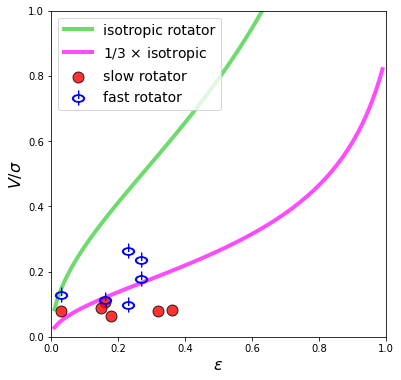

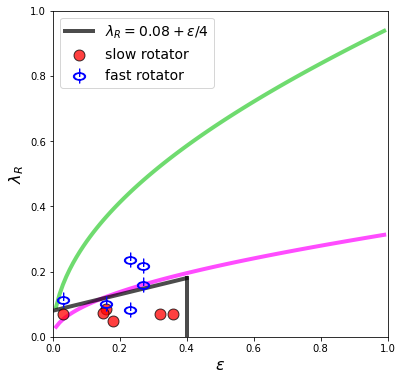

In [119]:
# plot the V_sigma and lambda_R to ellipticities

plt.figure(figsize=(6,6))
plt.xlim(0.0,1.0)
plt.ylim(0.0,1.0)
plt.plot(epsilons, V_sigmas_iso, 
         c='limegreen',linewidth=4,zorder=-1, alpha=0.7,
        label='isotropic rotator')
plt.plot(epsilons, 1/3 * V_sigmas_iso, 
         c='magenta',linewidth=4,zorder=-1, alpha=0.7,
        label=r'1/3 $\times$ isotropic')
plt.scatter(eps_slow, V_sigmas_slow, s=120, c='r', marker='o', label='slow rotator', alpha=0.8, edgecolor='k')
plt.scatter(eps_fast, V_sigmas_fast, s=230, c='b', marker=rotator, label='fast rotator')
plt.xlabel(r'$\epsilon$',fontsize=16)
plt.ylabel(r'$V/\sigma$',fontsize=16)
plt.legend(fontsize=14)
plt.savefig(f'{data_dir}mosaics/kinematic_class_vsigma.png')
plt.savefig(f'{data_dir}mosaics/kinematic_class_vsigma.pdf')


plt.figure(figsize=(6,6))
plt.xlim(0.0,1.0)
plt.ylim(0.0,1.0)
plt.plot(epsilons, lambda_Rs_iso, 
         c='limegreen',linewidth=4,zorder=-1, alpha=0.7)
plt.plot(epsilons, 1/3 * lambda_Rs_iso, 
         c='magenta',linewidth=4,zorder=-1, alpha=0.7)
plt.plot([0.0, 0.4],[0.08, 0.08+0.4/4],
         linestyle='-',c='k',linewidth=4,zorder=-1, alpha=0.7)
plt.plot([0.4, 0.4],[0.0, 0.08+0.4/4],
         linestyle='-',c='k',linewidth=4,zorder=-1, alpha=0.7,
        label=r'$\lambda_R = 0.08 + \epsilon/4$')
plt.scatter(eps_slow, lambda_Rs_slow, s=120, c='r', marker='o', label='slow rotator', alpha=0.75, edgecolor='k')
plt.scatter(eps_fast, lambda_Rs_fast, s=230, c='b', marker=rotator, label='fast rotator')
plt.xlabel(r'$\epsilon$',fontsize=16)
plt.ylabel(r'$\lambda_R$',fontsize=16)
plt.legend(fontsize=14)
plt.savefig(f'{data_dir}mosaics/kinematic_class_lambdar.png')
plt.savefig(f'{data_dir}mosaics/kinematic_class_lambdar.pdf')

In [120]:
classifications

,obj_name,class,subclass,comments,ellipticity,V_sigma,lambda_R
0,SDSSJ0029-0055,slow,kdc? no rotation?,"misaligned 70 deg, possibly rotation at outer ...",0.160,0.107911,0.084878
1,SDSSJ0037-0942,fast,misaligned,"V 100 km/s, misaligned 27 deg, possible contam...",0.270,0.176446,0.158571
2,SDSSJ0330-0020,slow? poor,none,poor kinematics make it difficult to classify,0.230,0.129017,0.109658
3,SDSSJ1112+0826,fast,aligned,"V 100 km/s, perfect alignment",0.230,0.263330,0.234192
4,SDSSJ1204+0358,slow,"kdc, crd?","very round, no alignment issue, background sou...",0.030,0.077882,0.068771
5,SDSSJ1250+0523,fast,round,"V 100 km/s, very round 0.09, no alignment issue",0.030,0.127693,0.112299
6,SDSSJ1306+0600,0.0,0.0,0.0,0.091,0.108517,0.091037
7,SDSSJ1402+6321,fast,misaligned,"V 60 km/s, misaligned 35 deg",0.230,0.095982,0.082576
8,SDSSJ1531-0105,slow,complex? kdc? no rotation?,red region in bottom right not due to contamin...,0.320,0.078509,0.069539
9,SDSSJ1538+5817,slow,kdc? crd?,"V 60 km/s, PA_kin not clear, no contamination",0.180,0.064735,0.049908
